# Analysis 4: Dates

In [24]:
# Importing libraries and reading the data in dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_users = pd.read_csv(r'./Data/train_users_2.csv')
test_users = pd.read_csv(r'./Data/test_users.csv')

In [25]:
#Concating the datasets
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [26]:
users.dtypes

affiliate_channel           object
affiliate_provider          object
age                        float64
country_destination         object
date_account_created        object
date_first_booking          object
first_affiliate_tracked     object
first_browser               object
first_device_type           object
gender                      object
id                          object
language                    object
signup_app                  object
signup_flow                  int64
signup_method               object
timestamp_first_active       int64
dtype: object

In [27]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'], coerce=True)

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  if __name__ == '__main__':


In [28]:
users['Month_year_acc_creation']=users.date_account_created.map(lambda x: x.strftime('%Y-%m'))

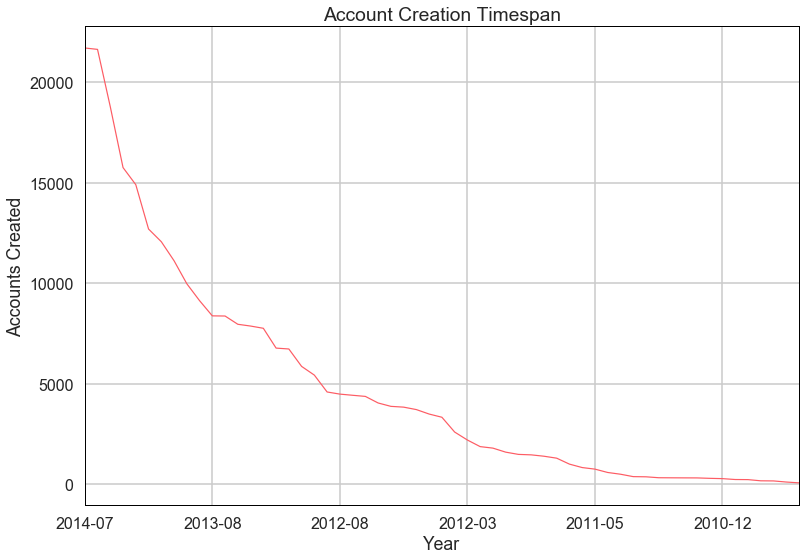

In [29]:
#To see the dates of our users and the timespan of them, let's plot the number of accounts 
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.0)
users.Month_year_acc_creation.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')
plt.xlabel('Year')
plt.ylabel('Accounts Created')
plt.title('Account Creation Timespan')
plt.show()

In [30]:
# Week days during which accounts have been created
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

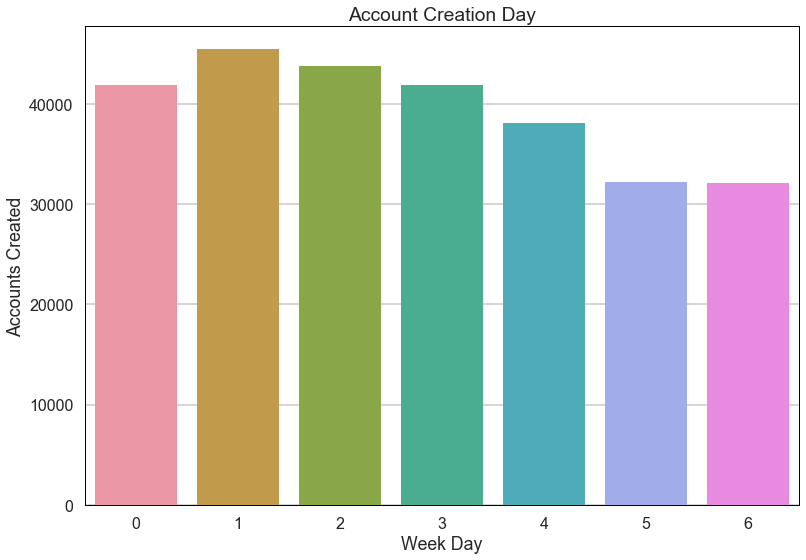

In [31]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
plt.ylabel('Accounts Created')
plt.title('Account Creation Day')
plt.show()

In [32]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')

In [22]:
users['timestamp_first_active'] = pd.to_datetime(users['timestamp_first_active'],format='%Y%m%d', coerce=True)

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  if __name__ == '__main__':


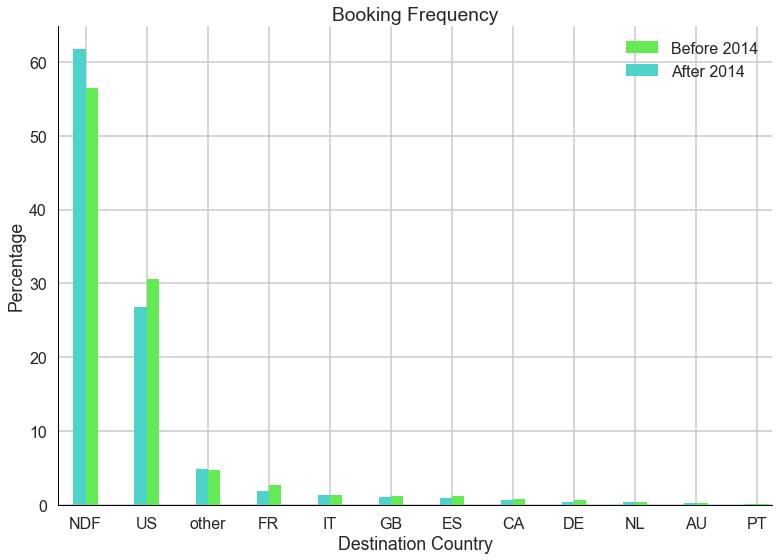

In [33]:
# Booking frequency for every user before and after 2014
date = pd.to_datetime(20140101, format='%Y%m%d')

before = sum(users.loc[users['date_first_active'] < date, 'country_destination'].value_counts())
after = sum(users.loc[users['date_first_active'] > date, 'country_destination'].value_counts())
before_destinations = users.loc[users['date_first_active'] < date, 
                                'country_destination'].value_counts() / before * 100
after_destinations = users.loc[users['date_first_active'] > date, 
                               'country_destination'].value_counts() / after * 100
width=0.2
before_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Before 2014', rot=0)
after_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='After 2014', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Booking Frequency')

sns.despine()
plt.show()

It's a clean comparision of usual destinations then and now, where we can see how the new users, register more and book less, and when they book they stay at the US.